In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mnist-numpy/mnist.npz


In [ ]:
#I will use Keras deep learning library to implement ConvNet 
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data("/kaggle/input/mnist-numpy/mnist.npz")

#plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
# plt.subplot(422)
# plt.imshow(X_train[0])

plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

# plt.subplot(424)
# plt.imshow(X_train[1])

plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

# plt.subplot(426)
# plt.imshow(X_train[2])

plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# plt.subplot(428)
# plt.imshow(X_train[3])

plt.show()

In [ ]:
#following is a simple multi layer neural network for digit recognition
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [ ]:
#load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data('/kaggle/input/mnist-numpy/mnist.npz')
print("X_train,Y_train:")
print(str(X_train.shape)+","+str(Y_train.shape))
print("X_test, Y_test")
print(str(X_test.shape)+", "+str(Y_test.shape))

In [ ]:
pixelNum = X_train.shape[1]*X_train.shape[2]
print(pixelNum)
X_train = X_train.reshape((X_train.shape[0], pixelNum)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], pixelNum)).astype('float32')

print("X_train,Y_train:")
print(str(X_train.shape)+","+str(Y_train.shape))
print("X_test, Y_test")
print(str(X_test.shape)+", "+str(Y_test.shape))

In [ ]:
#scaling the grayscale value of each pixel.
#the value of a pixel ranges between 0 and 255
#in the following code I'll normalize the value to range within 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#the output variable is an integer between 0 and 9
#there are 10 output classes, since there are 10 digits
#I'll do a one hot encoding of the output classes and transform the vector of class integers into a binary matrix
print(Y_train.shape)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print(Y_train.shape)
numOfClasses = Y_train.shape[1]
print(numOfClasses)


In [ ]:
#NN model(one hidden layer with 784 weights and one softmax output layer)
def baseline_model(optimizer):
    model = Sequential()
    #kernel intializer intializes the weights of a layer
    model.add(Dense(units=pixelNum, input_dim=pixelNum, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=numOfClasses, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model          

In [ ]:
model = baseline_model('adam')
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=10, batch_size=200)

scores = model.evaluate(X_test, Y_test)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [ ]:
x_test = X_test.reshape(X_test.shape[0], 28,28)
x_test *= 255
plt.imshow(x_test[1093], cmap=plt.get_cmap('gray'))
print(Y_test[1093])

In [3]:
#In the following code snippet I'll build a simple ConvNet to recognize digits
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#this implementation uses Convolutional layer, max pooling layer and Dropout layer
(X_train,Y_train), (X_test,Y_test) = mnist.load_data('/kaggle/input/mnist-numpy/mnist.npz')
#2D convolution in keras expects the input/output arrays to be in [m][n_H][n_W][n_C] format
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')
# print(X_train.shape)
# print(X_test.shape)

#normalizing pixel values
X_train = X_train/255
X_test = X_test/255
#one hot encoding for output
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
numOfClasses = Y_test.shape[1]
numOfPixels = X_train.shape[1]*X_train.shape[2]
# print(numOfClasses)
# print(numOfPixels)

def cnn_model():
    model = Sequential()
    #1st layer is Conv layer with n_C = 32, f = 5, n_C_prev = 1, s = 1. p=0
    model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu' ))
    #2nd layer is max pooling layer with n_C = n_C_prev = 32, f = 2, s =1, p =0
    model.add(MaxPooling2D(pool_size=(2,2)))
    #3rd layer is a Dropout layer which randomly discards 20% of the nuerons
    model.add(Dropout(0.2))
    #4th layer is a Flatten layer which flattens a matrix into a vector which can be process by a Fully Connected Layer
    model.add(Flatten())
    #5th layer is a dense layer with 128 neurons
    model.add(Dense(units=128, activation='relu'))
    #6th layer is a softmax layer
    model.add(Dense(units=10, activation='softmax'))
    
    #categorical cross entropy denotes logarithmic loss
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model = cnn_model()
#batch size 200 and epoch = 10 translates into 3000 epochs((60000/200)*10)
model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=10, batch_size=200)
scores = model.evaluate(X_test, Y_test)

print(100-scores[1]*100)


Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2375 - accuracy: 0.9304 - val_loss: 0.0746 - val_accuracy: 0.9773
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0751 - accuracy: 0.9776 - val_loss: 0.0592 - val_accuracy: 0.9815
Epoch 3/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0514 - accuracy: 0.9848 - val_loss: 0.0412 - val_accuracy: 0.9866
Epoch 4/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0413 - val_accuracy: 0.9871
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.0264 - accuracy: 0.9918 - val_loss: 0.0341 - val_accuracy: 0.9884
Epoch 7/10
60000/60000 [==============================] - 2s 27us/s

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


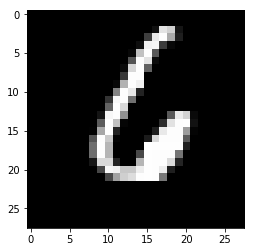

In [8]:
import matplotlib.pyplot as plt
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
plt.imshow(X_test[1990], cmap = plt.get_cmap('gray'))
print(Y_test[1990])

In [16]:
#Following is the code for a nearly state of the art CNN model for MNIST dataset
#this would be a larger model

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#loading data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data('/kaggle/input/mnist-numpy/mnist.npz')

#reshaping X_test and X_train to incoprate number of channels, which , in this case is 1(because grayscale)
X_trainFinal = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1).astype('float32')
X_testFinal = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

#normalizing the pixel values
X_trainFinal = X_trainFinal/255
X_testFinal = X_testFinal/255

#reshaping output vector into one hot matrix
Y_testFinal = np_utils.to_categorical(Y_test)
Y_trainFinal = np_utils.to_categorical(Y_train)

numOfClasses = Y_trainFinal.shape[1]
#print(numOfClasses)

def betterCNNModel():
    
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

model = betterCNNModel()
model.fit(X_trainFinal, Y_trainFinal, validation_data=(X_testFinal, Y_testFinal), epochs=10, batch_size=200)
scores = model.evaluate(X_testFinal, Y_testFinal)

print(100-scores[1]*100)

ValueError: Error when checking input: expected conv2d_6_input to have 4 dimensions, but got array with shape (60000, 28, 28)